In [2]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [4]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [5]:
argentina_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) & \
                      (indicator_data['CountryCode'] == 'AR')]

In [6]:
argentina_df_ind8.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [7]:
ts = argentina_df_ind8['Value'] 
ts1 = argentina_df_ind8[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,3.841451e+10
2015-01-01,2.552056e+10
2014-01-01,3.141082e+10
2013-01-01,3.053392e+10
2012-01-01,4.322327e+10


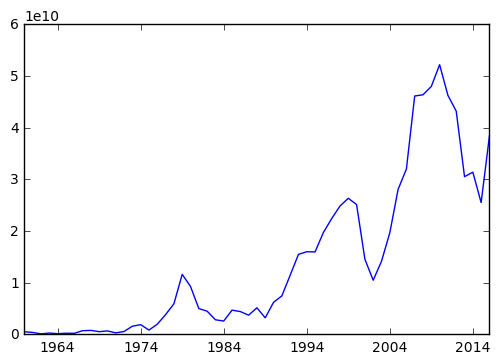

In [8]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


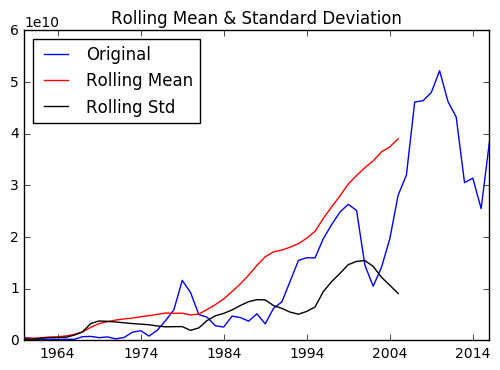

Results of Dickey-Fuller Test:
Test Statistic                 -4.048732
p-value                         0.001176
#Lags Used                     10.000000
Number of Observations Used    46.000000
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
Critical Value (1%)            -3.581258
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

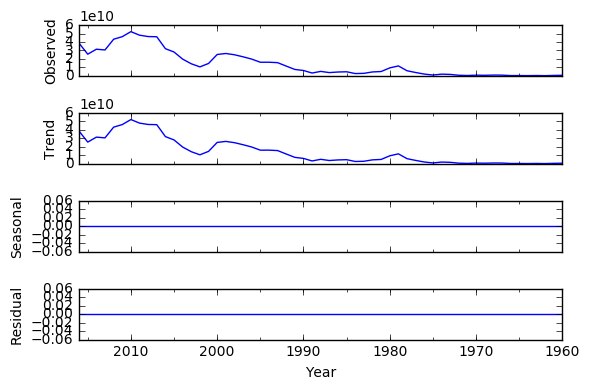

In [10]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [11]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

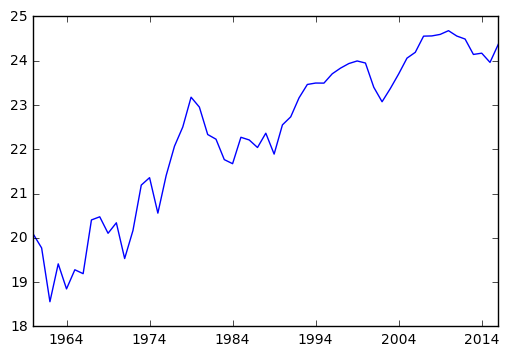

In [12]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


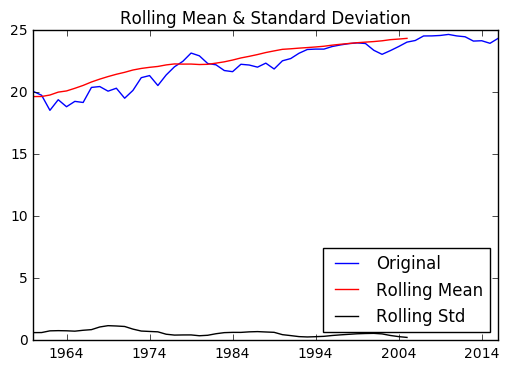

Results of Dickey-Fuller Test:
Test Statistic                 -0.900430
p-value                         0.787831
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
Critical Value (1%)            -3.552928
dtype: float64


In [13]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [14]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


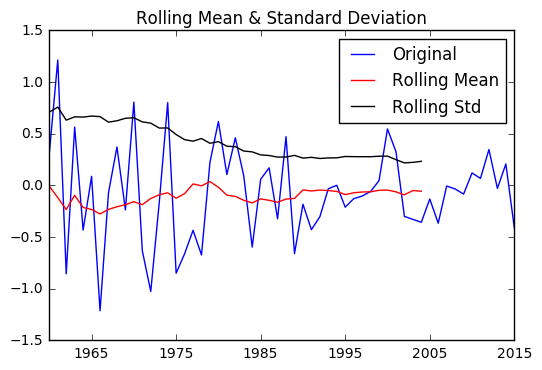

Results of Dickey-Fuller Test:
Test Statistic                -8.013810e+00
p-value                        2.165695e-12
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
Critical Value (1%)           -3.555273e+00
dtype: float64


In [15]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [16]:
def firstDifference(df):
    ts_first_diff = df - df.shift()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


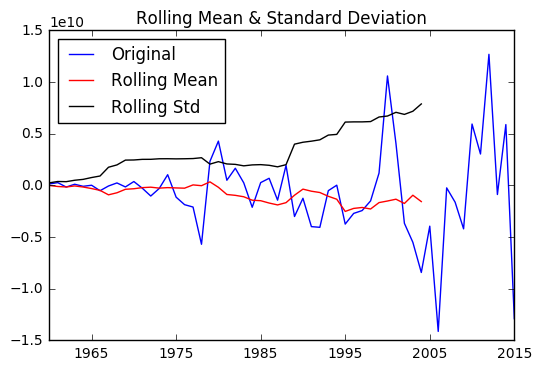

Results of Dickey-Fuller Test:
Test Statistic                 -3.400457
p-value                         0.010943
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
Critical Value (1%)            -3.557709
dtype: float64


In [17]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [18]:
def expWeightedavg(ts1_log):
    expwighted_avg = pd.ewma(ts1_log, halflife=1)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,adjust=True,halflife=1,ignore_na=False).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


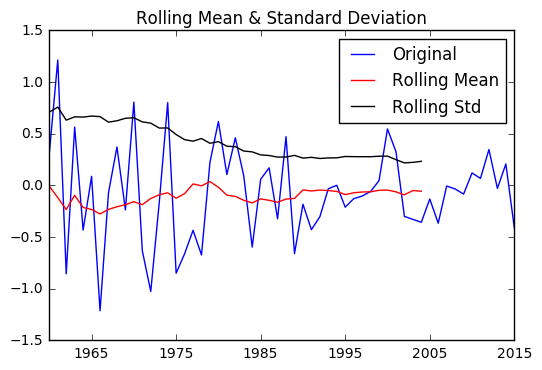

Results of Dickey-Fuller Test:
Test Statistic                -8.013810e+00
p-value                        2.165695e-12
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
Critical Value (1%)           -3.555273e+00
dtype: float64


In [19]:
ts_log_ewma_diff = expWeightedavg(ts1_log)
test_stationarity(ts_log_ewma_diff.Value)

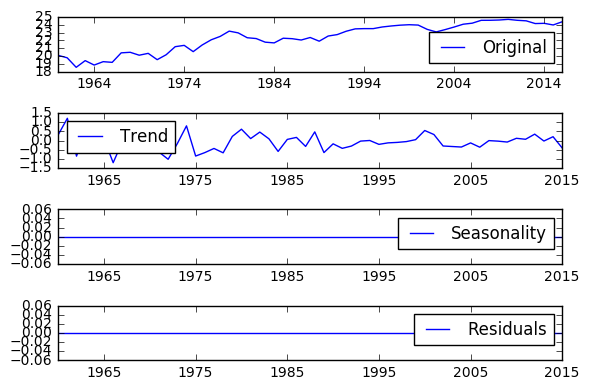

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log_diff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [21]:
lag_acf = acf(ts1_log_diff, nlags=10)
lag_pacf = pacf(ts1_log_diff, nlags=10, method='ols')

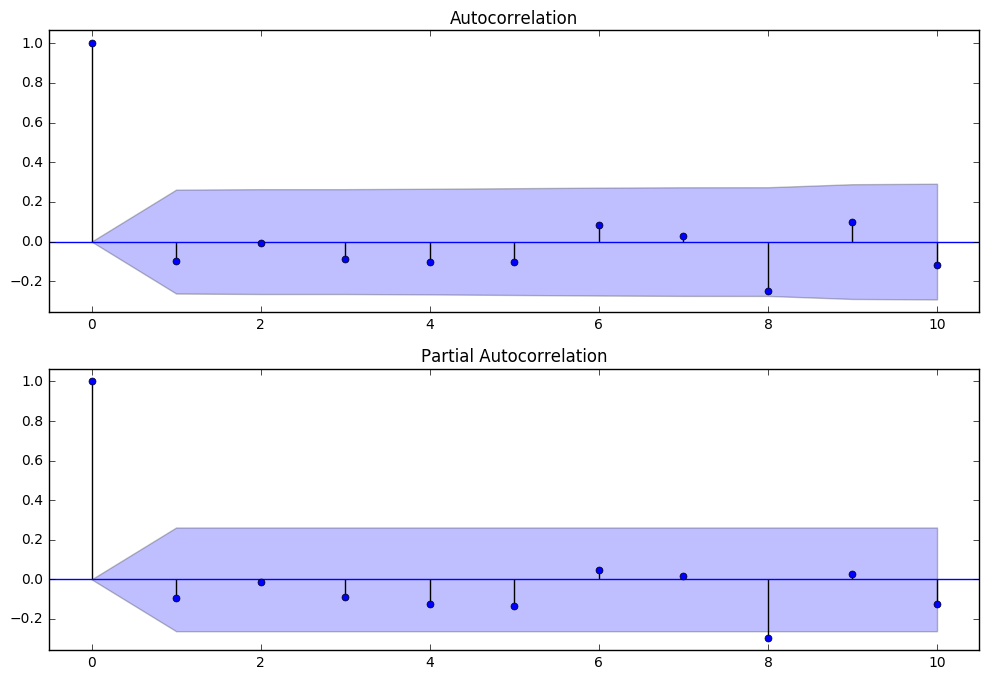

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log_diff, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log_diff, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

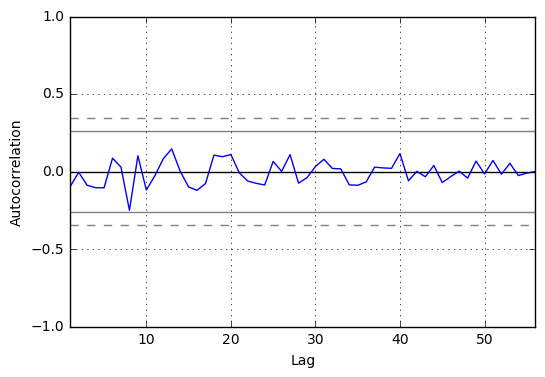

In [23]:
autocorrelation_plot(ts1_log_diff)
plt.show()

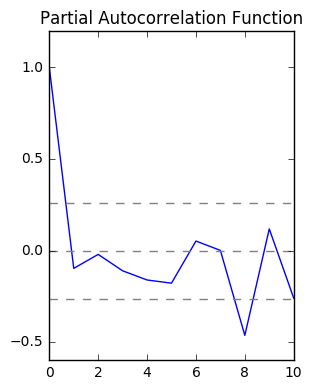

In [24]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [25]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [26]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [27]:
def AR_Model(ts):
    model = ARIMA(ts, order=(1, 1, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 1
Coefficients: const            0.015176
ar.L1.D.Value   -0.568721
dtype: float64
2005-01-01    1.257025
Freq: -1AS-JAN, dtype: float64
100.90663462905056


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


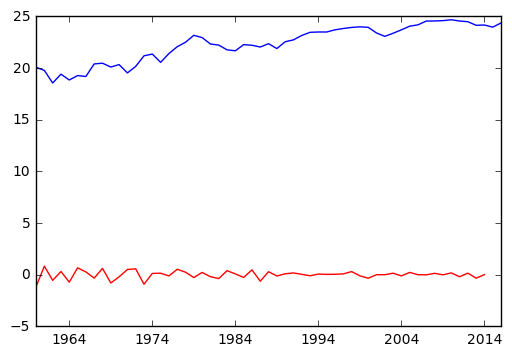

In [28]:
model_AR = AR_Model(ts1_log_diff)

In [29]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,1, 1))  
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 9))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const           -0.000506
ma.L1.D.Value   -0.999952
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   55
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -38.576
Method:                       css-mle   S.D. of innovations              0.470
Date:                Tue, 15 Aug 2017   AIC                             83.151
Time:                        21:14:03   BIC                             89.173
Sample:                    01-01-2014   HQIC                            85.480
                         - 01-01-1960                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -0.0005      0.004     -0.130      0.897        -0.008     0.007
ma.L1.D.Value    -1.0000      0.05

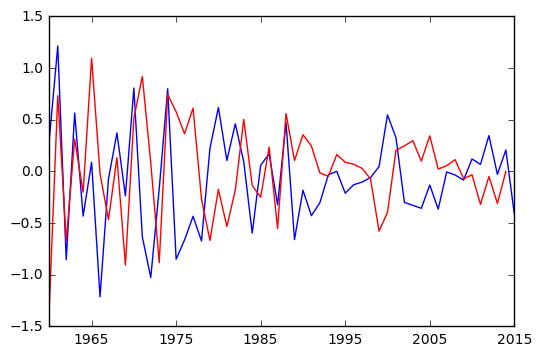

In [30]:
model_MA = MA_Model(ts1_log_diff)

In [31]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(1, 1, 1))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(10,0, 9))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 1
Coefficients: const           -0.000617
ar.L1.D.Value   -0.081820
ma.L1.D.Value   -1.000000
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -38.395
Method:                       css-mle   S.D. of innovations              0.468
Date:                Tue, 15 Aug 2017   AIC                             84.791
Time:                        21:14:05   BIC                             92.820
Sample:                    01-01-2014   HQIC                            87.896
                         - 01-01-1960                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -0.0006      0.004     -0.172      0.864        -0.008     0.006
ar.L1.D.

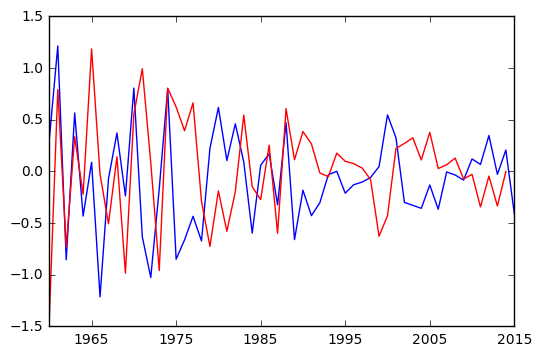

In [32]:
model_Combined = Combined_Model(ts1_log_diff)

In [33]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(0, 0, 9))


In [34]:
aic_metric

,AIC,Modelname
0,100.906635,"ARIMA(ts, order=(2, 0, 0))"
0,83.151267,"ARIMA(ts, order=(0, 0, 9))"
0,84.790640,"ARIMA(ts, order=(10,0, 9))"


In [35]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    output.tolist()
    #output = np.exp(output)
    out=normal(output)
    return out

In [61]:
def forC(n):
    output_forecast = forecast(model_Combined,len(ts1_log))
    return output_forecast[:n]
forC(5)

normalized


Year
2016-01-01    0.872271
2015-01-01    0.788698
2014-01-01    0.710564
2013-01-01    0.639932
2012-01-01    0.575954
dtype: float64

In [40]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    PredictedVal=normal(fittedVal)
    print('Predicted existing values are:')
    return PredictedVal
FittedValues(model_MA)

Year
2014-01-01   -0.000506
2013-01-01   -0.309069
2012-01-01   -0.049231
2011-01-01   -0.319321
2010-01-01   -0.032350
2009-01-01   -0.071464
2008-01-01    0.113699
2007-01-01    0.055652
2006-01-01    0.022950
2005-01-01    0.344467
2004-01-01    0.099791
2003-01-01    0.297439
2002-01-01    0.248006
2001-01-01    0.203079
2000-01-01   -0.396068
1999-01-01   -0.577743
1998-01-01   -0.073265
1997-01-01    0.029388
1996-01-01    0.069535
1995-01-01    0.089915
1994-01-01    0.162941
1993-01-01   -0.047115
1992-01-01   -0.013550
1991-01-01    0.246296
1990-01-01    0.355709
1989-01-01    0.104948
1988-01-01    0.560744
1987-01-01   -0.551095
1986-01-01    0.235002
1985-01-01   -0.250213
1984-01-01   -0.136166
1983-01-01    0.503647
1982-01-01   -0.179583
1981-01-01   -0.532963
1980-01-01   -0.173063
1979-01-01   -0.667762
1978-01-01   -0.265546
1977-01-01    0.613674
1976-01-01    0.364933
1975-01-01    0.577254
1974-01-01    0.745743
1973-01-01   -0.883569
1972-01-01    0.082968
1971-0

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in exp


array([ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf])

In [39]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    print(predictions_ARIMA_diff)
    predictions_ARIMA_diff_cumsum = np.cumsum(np.concatenate((ts1.values[0], predictions_ARIMA_diff)))
    #predictions_ARIMA_log = pd.Series(ts1_log.ix[0], index=ts1_log.index)
    #print(predictions_ARIMA_diff_cumsum.shape," ",predictions_ARIMA_log.shape)
    #predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_diff_cumsum)
    print(predictions_ARIMA_diff_cumsum)
    print('normalized')
    return predictions_ARIMA